<a href="https://colab.research.google.com/github/katherina-jiawen/InClassEcon441B/blob/main/HW_Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.) Import and Clean data

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/UCLA/Econ 441B/Country-data.csv", sep = ",")

In [5]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [26]:
names = df[["country"]]
X = df.drop(["country"], axis = 1)
X


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [8]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Fit a kmeans Model with any Number of Clusters

In [19]:
kmeans = KMeans(n_clusters= 5, random_state=42).fit(X_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# 2.) Pick two features to visualize across

In [20]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

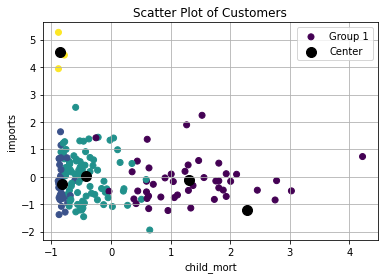

In [21]:
# CHANGE THESE BASED ON WHICH IS INTERESTING TO YOU
x1_index = 0
x2_index = 3


plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100)

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')
plt.legend(["Group 1", "Center", "Group 2"])
plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means
 

In [22]:
WCSSs = []
Ks = range(1,10)
for k in Ks:
  kmeans = KMeans(n_clusters=k, n_init=30, random_state=42)
  kmeans.fit(X_scaled)
  WCSSs.append(kmeans.inertia_)

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

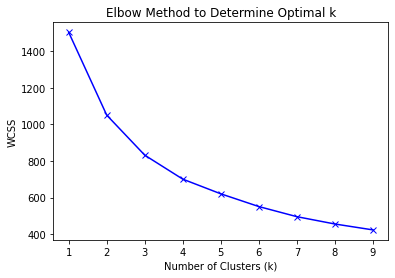

In [23]:
import matplotlib.pyplot as plt
plt.plot(Ks, WCSSs, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method to Determine Optimal k')
plt.show()

The number of clusters I would choose is 3 since this is the point when the drop in ECSS drops by not as much

In [32]:
kmeans2 = KMeans(n_clusters= 3, random_state=42).fit(X_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


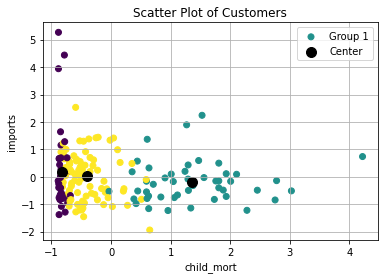

In [33]:
x1_index = 0
x2_index = 3


plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans2.labels_, cmap='viridis')
plt.scatter(kmeans2.cluster_centers_[:, x1_index], kmeans2.cluster_centers_[:, x2_index], marker='o', color='black', s=100)

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')
plt.legend(["Group 1", "Center", "Group 2"])
plt.grid()
plt.show()

# 5.) Create a list of the countries that are in each cluster. Write interesting things you notice. Hint : Use .predict(method)

In [37]:
cluster_labels = kmeans2.predict(X_scaled)
df['cluster'] = cluster_labels
for i in range(3):
    print("Countries in cluster", i)
    print(df[df['cluster'] == i]['country'].values)
    print("------------------------")

Countries in cluster 0
['Australia' 'Austria' 'Bahrain' 'Belgium' 'Brunei' 'Canada' 'Cyprus'
 'Czech Republic' 'Denmark' 'Finland' 'France' 'Germany' 'Greece'
 'Iceland' 'Ireland' 'Israel' 'Italy' 'Japan' 'Kuwait' 'Luxembourg'
 'Malta' 'Netherlands' 'New Zealand' 'Norway' 'Portugal' 'Qatar'
 'Singapore' 'Slovak Republic' 'Slovenia' 'South Korea' 'Spain' 'Sweden'
 'Switzerland' 'United Arab Emirates' 'United Kingdom' 'United States']
------------------------
Countries in cluster 1
['Afghanistan' 'Angola' 'Benin' 'Botswana' 'Burkina Faso' 'Burundi'
 'Cameroon' 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Equatorial Guinea' 'Eritrea' 'Gabon'
 'Gambia' 'Ghana' 'Guinea' 'Guinea-Bissau' 'Haiti' 'Iraq' 'Kenya'
 'Kiribati' 'Lao' 'Lesotho' 'Liberia' 'Madagascar' 'Malawi' 'Mali'
 'Mauritania' 'Mozambique' 'Namibia' 'Niger' 'Nigeria' 'Pakistan' 'Rwanda'
 'Senegal' 'Sierra Leone' 'South Africa' 'Sudan' 'Tanzania' 'Timor-Leste'
 'Togo' 'Uganda' 'Yem

In [38]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,2
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


cluster 0 contains wealthy countries that have low child mortality rates and high incomes
cluster 1 contains the poorest countries with moderate to high child mortality rates and low incomes. 
Cluster 2 contains countries in the middle with moderate child mortality rates and moderate incomes.

#6.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [39]:
centroids = kmeans2.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns=X.columns)
centroid_df.index.name = 'Cluster'
centroid_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Cluster,,,,,,,,,
0,-0.827449,0.645080,0.727411,0.190639,1.484243,-0.484921,1.079579,-0.791877,1.615995
1,1.360218,-0.437533,-0.155984,-0.189204,-0.686894,0.402111,-1.282180,1.364944,-0.604242
2,-0.406453,-0.031653,-0.224471,0.024162,-0.251770,-0.017167,0.254734,-0.424343,-0.354481


# Q7.) Write an observation about the descriptive statistics.

Cluster 0 has the lowest child_most, highest exports, highest health, highest imports, highest income, lowest inflation, highest life_expec, lowest total_fer, and highest gdpp, which we can conclude cluster 0 contains wealth and developed countries. 
Cluster 1, on the other hand, has highest child_mort,inflation,and total_fer. and lowest exports,imports,income,life_expec and gdpp. Thus, cluster 1 contains poorest countries. 
Clustrer 2 has moderate centroid for all the values. Thus, it contains countries that are in the middle which are largely developing countries.